# **Ejercicio en Python #1**

### Ecuación diferencial del circuito estándar de neuronas

### Aquí modelamos el circuito estándar de una neurona para visualizar cómo cambia $u(t)$ cuando $I(t)$ es un impulso cuadrado que dura 200 ms

$$\tau_m \frac{du}{dt}=-[u(t)-u_{rest}] + RI(t)$$

$$\frac{du}{dt}=\frac{-[u(t)-u_{rest}] + RI(t)}{\tau_m}$$

### Usaremos los siguientes valores

* $\tau_m = RC = 10 ms$
* $u_{rest} = -65 mV$
* $R = 5 m\Omega$
* $t$ es un vector que va de 0 a 200 ms
* $I(t<50) = 0$
* $I(50<t<150)=10 mA$
* $I(150<t<200) = 0$
* La unica condicion inicial es $u(0) = 0$

In [1]:
# Importa las librerias de Python necesarias
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

In [2]:
# Define el modelo de la ecuacion diferencial del circuito
def circuitoEstandar(u,t,I):
    # Define constantes
    u_reposo = -65.0
    R = 5.0
    tau = 10.0
    # Calcula la derivada en el tiempo
    dudt = (-(u - u_reposo) + (R*I) )/tau
    return dudt

In [3]:
# Define el vector t
pasos = 1000
tiempo = np.linspace(0.0,200.0,pasos)

# Define la señal cuadrada de I(t)
I_t = np.zeros_like(tiempo)
I_t[tiempo>50] = 10.0
I_t[tiempo>150] = 0.0

# Define el vector u(t) para guardar la solucion
u_t = np.empty_like(tiempo)

# Declara la condicion inicial
u_rest = -65.0
u_t[0] = u_rest

In [4]:
# Resuelve el sistema de EDO paso a paso con un ciclo FOR
for i in range(1,len(tiempo)):
    # Iniciamos el iterador en 1 porque el valor 0 ya lo definimos arriba
    # Define el tamano del paso en el tiempo
    tpaso = [tiempo[i-1],tiempo[i]]
    # Resuelve la ecuacion diferencial en el tiempo que abarca el paso
    z = odeint(circuitoEstandar,u_t[i-1],tpaso,args=(I_t[i-1],))    
    u_t[i] = z[1]

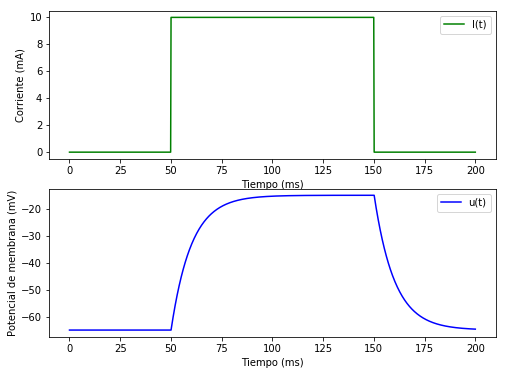

In [5]:
# Grafica los resultados
plt.figure(figsize=(8,6))
plt.subplot(2,1,1)
plt.plot(tiempo,I_t,'g',label='I(t)')
plt.ylabel('Corriente (mA)')
plt.xlabel('Tiempo (ms)')
plt.legend()

plt.subplot(2,1,2)
plt.plot(tiempo,u_t,'b',label='u(t)')
plt.ylabel('Potencial de membrana (mV)')
plt.xlabel('Tiempo (ms)')
plt.legend()

# **Ejercicio en Python #2**

### Implementacion del modelo de Hodgkin-Huxley en Python

### El modelo de Hodgkin-Huxley requiere que definamos 10 funciones (4 ecuaciones diferenciales y 6 funciones). Por ello, haremos este ejercicio por partes

# Parte A - Define tres funciones para calcular los valores de $\alpha_n,\alpha_m,\alpha_h$ que dependen del potencial de membrana de la neurona

### Los valores de alpha, como vimos en clase, dependen del voltaje de membrana $u(t)$ de acuerdo a las siguientes ecuaciones

$$\alpha_n = \frac{0.02(u-25)}{1-e^{-(u-25)/9}}$$

$$\alpha_m = \frac{0.182(u+35)}{1-e^{-(u+35)/9}}$$

$$\alpha_h = 0.25e^{-(u+90)/12}$$

### La primera ecuacion para $\alpha_n$ se muestra como ejemplo en el codigo de abajo

In [ ]:
# Define una funcion que calcula alpha_n dado un valor de u
def alpha_n(u):
    return ( 0.02*(u-25) )/( 1 - np.exp( -(u-25)/9 ) )

### Completa el siguiente codigo ###

# Define una function que calcula alpha_m dado un valor de u
def alpha_m(u):
    return #

# Define una function que calcula alpha_h dado un valor de u
def alpha_h(u):
    return #

# Parte B - Define tres funciones para calcular los valores de $\beta_n,\beta_m,\beta_h$ que dependen del potencial de membrana de la neurona

### Los valores de beta, como vimos en clase, dependen del voltaje de membrana $u(t)$ de acuerdo a las siguientes ecuaciones

$$\beta_n = \frac{-0.002(u-25)}{1-e^{(u-25)/9}}$$

$$\beta_m = \frac{-0.124(u+35)}{1-e^{(u+35)/9}}$$

$$\beta_h = \frac{0.25e^{(u+62)/6}}{e^{(u+90)/12}}$$

### La primera ecuacion para $\beta_n$ se muestra como ejemplo en el codigo de abajo

In [ ]:
# Define una funcion que calcula alpha_n dado un valor de u
def beta_n(u):
    return ( -0.002*(u-25) )/( 1 - np.exp( (u-25)/9 ) )

### Completa el siguiente codigo ###

# Define una function que calcula alpha_m dado un valor de u
def beta_m(u):
    return

# Define una function que calcula alpha_h dado un valor de u
def beta_h(u):
    return

# Parte C - Define las tres ecuaciones diferenciales para calcular los valores de $\frac{dn}{dt},\frac{dm}{dt},\frac{dh}{dt}$ que dependen del potencial de membrana de la neurona

### Estas ecuaciones son:

$$\frac{dn}{dt} = \alpha_n(1-n) - \beta_nn$$

$$\frac{dm}{dt} = \alpha_m(1-m) - \beta_mm$$

$$\frac{dh}{dt} = \alpha_h(1-h) - \beta_hh$$

### Donde las alphas y las betas se calculan con las funciones que definiste arriba

### La primera ecuacion diferencial para $\frac{dn}{dt}$ se muestra como ejemplo en el codigo de abajo

In [ ]:
# Define una funcion que calcula dn/dt dado un valor de u y de n
def dndt(u,n):
    a_n = alpha_n(u) # Aqui estamos mandando llamar la funcion alpha_n que definimos arriba
    b_n = beta_n(u)
    return a_n * (1 - n) - b_n*n

### Completa el siguiente codigo ###

def dmdt(u,m):
    a_m = 
    b_m =
    return

def dhdt(u,h):
    a_h =
    b_h =
    return

# Parte D - Define una funcion para calcular la sumatoria de las corrientes iónicas dados los valores $u, m, n$, y $h$

### La ecuación es

$$\sum_k I_k(t) = g_{Na}m^3h(u-E_{Na}) + g_{K}n^4(u-E_{K}) + g_{Cl}(u-E_{Cl})$$

### Los valores de las constantes $g$ y $E$ son:

Para sodio (Na):
$$E_{Na}=55 [mV]$$ 
$$g_{Na}=40 [mS/cm^2]$$ 

Para potasio (K):
$$E_{K}=-77 [mV]$$ 
$$g_{Na}=35 [mS/cm^2]$$ 

Para cloro (Cl):
$$E_{Cl}=-65 [mV]$$ 
$$g_{Cl}=0.3 [mS/cm^2]$$ 

### El codigo para calcular la corriente de sodio (Na) se muestra abajo como ejemplo. Completa el codigo para las corrientes de potasio y cloro y despues define una funcion que calcula la suma de las tres

In [ ]:
# Define una funcion que calcula I_Na dados los valores de u, m, h
def I_Na(u,m,h):
    E_Na = 55.0
    g_Na = 40.0
    return (g_Na * (m**3) * h) * (u - E_Na)

# Define una funcion que calcula I_K dados los valores de u, n
def I_K(u,n):
    E_K = -77.0
    g_K = 35.0
    return 

# Define una funcion que calcula I_Cl dado el valor de u
def I_Cl(u):
    E_Cl = -65.0
    g_Cl = 0.3
    return

def SumaIonicas(u,m,n,h):
    return I_Na(u,m,h) + I_K(u,n) + I_Cl(u)

# Parte E - Define la funcion para calcular $\frac{du}{dt}$ dada un valor de corriente externa y la suma de las corrientes ionicas

$$C\frac{du}{dt} = I_{ext}(t) - \sum_k I_k(t)$$

$$\frac{du}{dt} = \frac{I_{ext}(t) - \sum_k I_k(t)}{C}$$

### Experimentalmente, el valor de C ha sido estimado en 1 $\mu$F/$cm^2$

### El codigo completo para calcular $\frac{du}{dt}$ se muestra abajo (no hay necesidad de completar nada por ahora)

In [ ]:
# Define una funcion que calcula du/dt dado un valor de corriente externa y un valor de suma de corrientes ionicas
def dudt(Iext,Isuma_ion):
    # Define constante de capacitancia
    C = 1.0
    return (Iext - Isuma_ion)/C

# Parte F - Define una funcion de Python que incluye el sistema de ecuaciones diferenciales del modelo completo de Hodgkin-Huxley

In [ ]:
def HodgkinHuxley(condiciones_iniciales, t, I_externa):
    
    # En este sistema, la variable "condiciones_iniciales" contiene los valores de [u,m,n,h] en un momento dado
    u = condiciones_iniciales[0]
    m = condiciones_iniciales[1]
    n = condiciones_iniciales[2]
    h = condiciones_iniciales[3]
    
    # Primero, calculamos las derivadas de m,n,h
    Dm = dmdt(u,m)
    Dn = dndt(u,n)
    Dh = dhdt(u,h)
    
    # Ahora calculamos la derivada de u
    Isuma_ion = SumaIonicas(u,m,n,h)
    Du = dudt(I_externa, Isuma_ion)
    
    # La funcion debe regresar el valor de las cuatro derivadas calculadas
    return [Du,Dm,Dn,Dh]

# Parte Final - Resuelve el modelo para una corriente externa igual a un tren de impulsos

### Condiciones iniciales:
$$u(0) = -65 mV$$
$$n(0) = m(0) = h(0) = 0$$

### Corriente externa
Usaremos un tren de impulsos de corta duracion (2 ms) pero de gran intensidad (100 mA) como se muestra abajo

In [ ]:
# Define el numero de pasos
pasos = 1000

# Define el vector tiempo
tiempo = np.linspace(0.0,100.0,pasos) # Simularemos un tiempo total de 100 ms

# Inicializa el tren de impulsos de Iext(t)
I_ext = np.zeros_like(tiempo)

# Haremos un ciclo FOR para crear un impulso de 100 mA cada 10 ms
t_impulsos = [10, 20, 30, 40, 50, 60, 70, 80, 90]
t_duracion = 2

for i in range(len(t_impulsos)):
    I_ext[tiempo>t_impulsos[i]] = 100.0
    I_ext[tiempo>t_impulsos[i]+t_duracion] = 0.0

# Grafica I_ext para que veas la forma de la onda de entrada a la neurona
plt.figure(figsize=(6,2))
plt.plot(tiempo,I_ext,'g',label='I(t)')
plt.ylabel('Corriente (mA)')
plt.xlabel('Tiempo (ms)')
plt.legend()

### Resuelve el modelo de Hodgkin-Huxley

In [ ]:
# Crea una lista con condiciones iniciales
ci = [-65.0, 0.0, 0.0, 0.0] # u(0), m(0), n(0), h(0)

# Define los vectores u(t), n(t), m(t), h(t) para guardar la solucion
u_t = np.empty_like(tiempo)
m_t = np.empty_like(tiempo)
n_t = np.empty_like(tiempo)
h_t = np.empty_like(tiempo)

# Inicializa el valor de u_t
u_t[0] = ci[0] # = -65 mV (potencial de reposo)
m_t[0] = ci[1]
n_t[0] = ci[2]
h_t[0] = ci[3]

# Resuelve el sistema de EDO de Hodgkin-Huxley paso a paso con un ciclo FOR
for i in range(1,len(tiempo)):
    # Iniciamos el iterador en 1 porque el valor 0 ya lo definimos arriba
    # Define el tamano del paso en el tiempo
    tpaso = [tiempo[i-1],tiempo[i]]
    # Resuelve las ecuaciones diferenciales del model HH en el tiempo que abarca el paso
    z = odeint(HodgkinHuxley,ci,tpaso,args=(I_ext[i-1],))
    # La variable "z" captura los valores de u,m,n,h en dos puntos en el tiempo:
    # Estos cuatro valores en el tiempo son los que estan dentro de "tpaso"
    u_t[i] = z[1][0]
    m_t[i] = z[1][1]
    n_t[i] = z[1][2]
    h_t[i] = z[1][3]
    
    # Actualiza las condiciones iniciales
    ci = z[1]

In [ ]:
# Grafica los resultados
plt.figure(figsize=(8,6))
plt.subplot(3,1,1)
plt.plot(tiempo,I_ext,'g',label='I(t)')
plt.ylabel('Corriente (mA)')
plt.xlabel('Tiempo (ms)')
plt.legend()

plt.subplot(3,1,2)
plt.plot(tiempo,u_t,'b',label='u(t)')
plt.ylabel('Potencial (mV)')
plt.xlabel('Tiempo (ms)')
plt.legend()

plt.subplot(3,1,3)
plt.plot(tiempo,m_t,label='m(t)')
plt.plot(tiempo,n_t,label='n(t)')
plt.plot(tiempo,h_t,label='h(t)')
plt.ylabel('Probabilidad (%)')
plt.xlabel('Tiempo (ms)')
plt.legend()

# **Ahora tienes una neurona *in silico* con la que puedes experimentar**

* ¿Qué pasa si la corriente de $I_{ext}$ no es 100 mA sino 10 mA?
* ¿Qué pasa si en lugar de impulsos cortos tenemos dos impulsos largos que duren 40 ms en t=5 y en t=50?
* ¿Qué pasa si cambias las condiciones iniciales de m, n, h para que sean igual 1?